In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# Image source:
Image(url= "https://cdn-images-1.medium.com/max/1800/1*uLHXR8LKGDucpwUYHx3VaQ.png")

# Multiple Linear Regression in Python

## Generate DataSet
First we'll generate a testing dataset: 

In [2]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,
               columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

# Have a look at the head of the data frame
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


## Pull out variables of interest and scale
Next we'll pull out the variables we went to test. You can add more than two variables on the X axis, but we'll keep it simple for this example. 

At this point we also scale the features to ensure they have a zero mean and unit variance. 

In [3]:
x = df[['Interest_Rate','Unemployment_Rate']]
y = df['Stock_Index_Price']

# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## sklearn: 
We'll first fit our model and make predictions with sklearn: 

In [4]:
# with sklearn
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)

# Predict
y_predicted = regression_model.predict(x)

print('Intercept: \n', regression_model.intercept_) # pull out intercept
print('Coefficients: \n', regression_model.coef_) # pull out coeffeicients

Intercept: 
 1070.0833333333328
Coefficients: 
 [118.23278717 -80.81515288]


This output includes the intercept and coefficients. You can use this information to build the multiple linear regression equation as follows:

`Stock_Index_Price = (Intercept) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2`

And once you plug the numbers:

`Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2`

In [5]:
# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
# Create a scaled feature array and make the prediction
feature_array = scaler.transform([[New_Interest_Rate ,New_Unemployment_Rate]])
print ('Predicted Stock Index Price: \n', regression_model.predict(feature_array))

Predicted Stock Index Price: 
 [1422.86238865]


Imagine that you want to predict the stock index price after you collected the following data:

Interest Rate = 2.75 (i.e., X1= 2.75)
Unemployment Rate = 5.3 (i.e., X2= 5.3)
If you plug that data into the regression equation, you’ll get the exact same predicted results as displayed in the second part:

`Stock_Index_Price = (1798.4040) + (345.5401)*(2.75) + (-250.1466)*(5.3) = 1422.86`

## Statsmodels
Now we'll do the same thing with statsmodels, and as you can see, the results are the same: 

In [6]:
# with statsmodels
X = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           4.04e-11
Time:                        17:40:48   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1070.0833     14.403     74.294      0.0

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


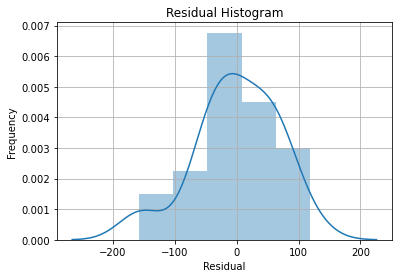

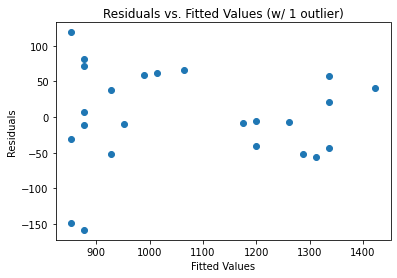

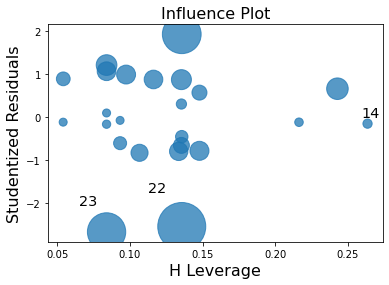

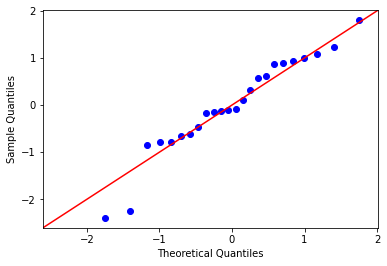

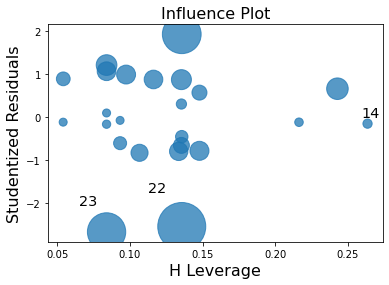

In [7]:
# Get Linear Regression Summary Plots
# Summary graphs:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *
import seaborn as sns
import numpy as np

sns.distplot(model.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# Residuals vs Fitted Values
residuals = model.resid # outlier_linear = name of linear model on our dataset
fitted_vals = model.predict(X) # making predictions from our fit model
plt.plot(fitted_vals, residuals, 'o') # plotting predictions from fit model vs residuals
#plt.hlines(0, xmin = np.minimum(fitted_vals), xmax = np.maximum(fitted_vals))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (w/ 1 outlier)')
plt.show()

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Leverage Plot (Cook's Distance)
influence_plot(model)  # from statsmodels.graphics.regressionplots import *